In [ ]:
pip install qiskit==2.0

In [ ]:
pip install qiskit_aer==0.17

In [ ]:
pip install qiskit_ibm_runtime==0.38

In [ ]:
pip install numpy==2.2

In [ ]:
pip install pylatexenc==2.10

In [ ]:
pip install matplotlib==3.9

# Chapter 7. Coding Two-Qubit Algorithms in Qiskit

## 7.2. Working with two qubits in Qiskit

In [1]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(2)   

In [2]:
circuit.h(0)
circuit.x(1)

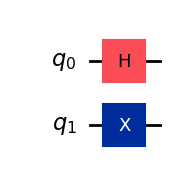

In [3]:
circuit.draw("mpl")

In [4]:
circuit.measure_all()

from qiskit_aer import AerSimulator
backend = AerSimulator(seed_simulator = 18620123)

from qiskit_ibm_runtime import SamplerV2 as Sampler
sampler = Sampler(backend)

job = sampler.run([circuit], shots = 8)
result = job.result()[0].data.meas 

print(result.get_counts())

{'11': 5, '10': 3}


In [5]:
print(result.get_bitstrings())

['11', '10', '11', '10', '11', '11', '11', '10']


In [6]:
print(result.array)

[[3]
 [2]
 [3]
 [2]
 [3]
 [3]
 [3]
 [2]]


In [7]:
circuit.remove_final_measurements()

from qiskit.quantum_info import Statevector

state = Statevector(circuit)
print(state)

Statevector([0.        +0.j, 0.        +0.j, 0.70710678+0.j,
             0.70710678+0.j],
            dims=(2, 2))


In [8]:
circuit = QuantumCircuit(2) 

circuit.h(0)
circuit.cx(0,1)

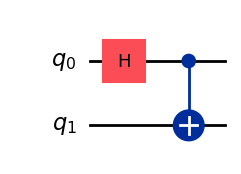

In [9]:
circuit.draw("mpl")

## 7.2 Superdense coding

In [10]:
circuit = QuantumCircuit(2) 
# Bell state preparation
circuit.h(0)
circuit.cx(0,1)

circuit.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=2, num_clbits=0, params=[]), qubits=(<Qubit register=(2, "q"), index=0>, <Qubit register=(2, "q"), index=1>), clbits=())

In [11]:
b1 = 1
b2 = 0

# Alice's ops (in reverse because of Qiskit coding)

if b1:
    circuit.x(0)
if b2:
    circuit.z(0)

circuit.barrier() # Qubit sent to Bob

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=2, num_clbits=0, params=[]), qubits=(<Qubit register=(2, "q"), index=0>, <Qubit register=(2, "q"), index=1>), clbits=())

In [12]:
circuit.cx(0,1)
circuit.h(0)
circuit.measure_all()

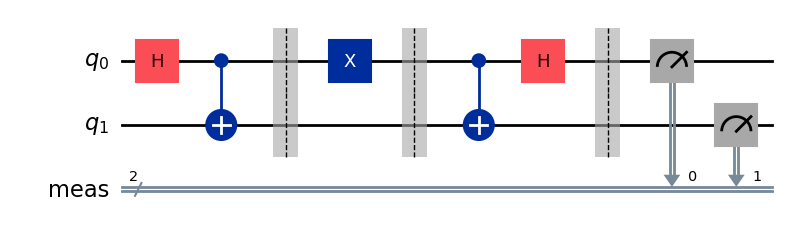

In [13]:
circuit.draw("mpl")

## 7.3 The CHSH game

In [14]:
import numpy as np

seed = 1234
np.random.seed(seed)
reps = 1000

x = np.random.randint(2, size = reps)
y = np.random.randint(2, size = reps)

In [15]:
circuit_list = []

for i in range(reps):

    circuit = QuantumCircuit(2)

    # Bell state preparation
    circuit.h(0)
    circuit.cx(0,1)

    circuit.barrier() 
  
    # Alice and Bob's ops

    if x[i] == 1:
        circuit.ry(np.pi/2,0)
    if y[i] == 0:
        circuit.ry(np.pi/4,1)
    else:
        circuit.ry(-np.pi/4,1)
    circuit.measure_all()

    circuit_list.append(circuit)

In [16]:
sampler = Sampler(AerSimulator(seed_simulator = seed))

job = sampler.run(circuit_list, shots = 1)
results = job.result()

wins = 0

for i in range(reps):
    bits = results[i].data.meas.get_bitstrings() 
    a = int(bits[0][1])
    b = int(bits[0][0])

    if x[i]*y[i] == 0:
        if a == b:
            wins+=1
    else:
        if a != b:
            wins += 1

print("Win percentage:", 100*wins/reps)

Win percentage: 85.9


## 4.3 Deutsch's algorithm

In [17]:
circuit = QuantumCircuit(2,1)
circuit.h(0)
circuit.x(1)
circuit.h(1)

circuit.barrier()

# PLACE YOUR ORACLE HERE
circuit.x(0)
circuit.cx(0,1)
circuit.x(0)

circuit.barrier()

circuit.h(0)
circuit.measure([0],[0])

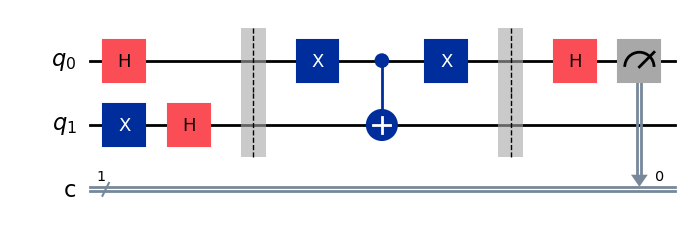

In [18]:
circuit.draw("mpl")

In [19]:
backend = AerSimulator(seed_simulator = 18620123)
sampler = Sampler(backend)

job = sampler.run([circuit], shots = 8)
result = job.result()[0].data.c 

print(result.get_counts())

{'1': 8}
